In [1]:
##Option1 is the script where we divided the training set into train and validation set


# Loading required libraries:
## Sklearn modules
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 

###modules for preprocessing, training, test data and validation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
## Classification
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

##PLotting modules
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
import numpy as np
import seaborn as sns
import plotly.offline as pyo 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from matplotlib.colors import ListedColormap

In [2]:
#Loading data
data = pd.read_table("fruit_data_with_colors.txt")
data.head() 

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
## data shape
row, columns = data.shape 
print ('Number of rows', row)
print ('Number of columns', columns)

Number of rows 59
Number of columns 7


In [4]:
# Data descriptions 
print(data.describe().T)

             count        mean        std    min     25%     50%     75%  \
fruit_label   59.0    2.542373   1.208048   1.00    1.00    3.00    4.00   
mass          59.0  163.118644  55.018832  76.00  140.00  158.00  177.00   
width         59.0    7.105085   0.816938   5.80    6.60    7.20    7.50   
height        59.0    7.693220   1.361017   4.00    7.20    7.60    8.20   
color_score   59.0    0.762881   0.076857   0.55    0.72    0.75    0.81   

                max  
fruit_label    4.00  
mass         362.00  
width          9.60  
height        10.50  
color_score    0.93  


In [5]:
#data types
print (data.dtypes)

fruit_label        int64
fruit_name        object
fruit_subtype     object
mass               int64
width            float64
height           float64
color_score      float64
dtype: object


In [6]:
##copying data
data_copy= data.copy(deep=True)

In [7]:
# Coulumn with categorical values
data_size=data_copy.groupby('fruit_label').size()
print ('Column name', 'Apple','Mandarin','orange' ,'lemon'':', data_size)

Column name Apple Mandarin orange lemon: fruit_label
1    19
2     5
3    19
4    16
dtype: int64


In [8]:
data_copy['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

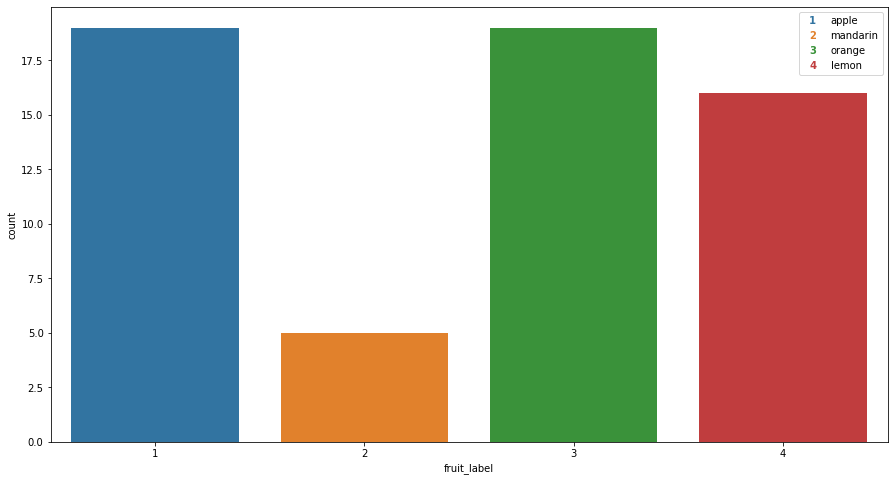

In [9]:
class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]
## Bar plot for Column diagnosis
sns.set_style()
plt.figure(figsize=(15,8))
ax=sns.countplot(x='fruit_label',data=data_copy)
textname= "1 2 3 4".split()
labels= ['apple', 'mandarin', 'orange', 'lemon']
t = ax.get_xticklabels()
labeldic = dict(zip(textname, labels))
labels = [labeldic[h.get_text()]  for h in t]
# print (labels)
# handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]
handles_list=[]
for h,c in zip(t,ax.patches):
    handles = h.get_text(),c.get_fc()
    handles_list.append(handles)



ax.legend(handles_list, labels, handler_map={tuple : TextHandler()}) 
plt.show()

In [10]:
## creating training and test data set
x = data_copy[['mass','width','height']]

y= data_copy['fruit_label']

In [11]:
#scaling the values using Standard Scalar Library
from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))
print (pd.DataFrame(x, columns=['mass','width','height']))

        mass     width    height
0   0.529442  1.598690 -0.291397
1   0.309462  1.104854 -0.661922
2   0.236136  0.364100 -0.365502
3  -1.413709 -1.117409 -2.218131
4  -1.450372 -1.364327 -2.292236
5  -1.523699 -1.611245 -2.514552
6  -1.523699 -1.487786 -2.514552
7  -1.597025 -1.611245 -2.736867
8   0.272799 -0.006278  0.079129
9   0.162810  0.364100 -0.513712
10  0.052820 -0.253196 -0.291397
11  0.162810 -0.006278 -0.069081
12 -0.167159 -0.129737 -0.439607
13  0.016157  0.240641  0.005024
14 -0.203823  0.611018 -0.291397
15 -0.130496  0.734477 -0.439607
16 -0.130496  0.611018 -0.143186
17  0.089483  0.487559 -0.069081
18 -0.020507  0.487559 -0.439607
19 -0.020507  0.364100 -0.365502
20 -0.057170  0.487559 -0.143186
21 -0.130496  0.364100 -0.217291
22 -0.423802  0.240641 -0.439607
23  0.126146  0.611018  0.153234
24  3.279183  2.339445  1.264812
25  3.535826  2.586363  1.116602
26  3.645816  3.080199  1.116602
27  0.749421  0.487559  1.116602
28 -0.423802 -0.500114 -0.439607
29 -0.0571

In [12]:
#Spliting test datase as 30%
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0) 
print ('x_train:',len(x_train))
print ('x_test:',len(x_test))
print ('y_train:',len(y_train))
print ('y_test:',len(y_test))

x_train: 41
x_test: 18
y_train: 41
y_test: 18


1
3
5
7
9
11
13
15
17


/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=10.

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=10.

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=10.

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=10.

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=10.

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning:

The least populated class in

19
21
23
25
27
29
[0.755, 0.805, 0.76, 0.735, 0.635, 0.585, 0.61, 0.61, 0.61, 0.61, 0.61, 0.5599999999999999, 0.43499999999999994, 0.41, 0.385]
The maximum cross validation score is 0.805 at K = 3
The minimum error rate is 0.19499999999999995 at K = 3


/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=10.

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=10.

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=10.

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=10.

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=10.

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning:

The least populated class in

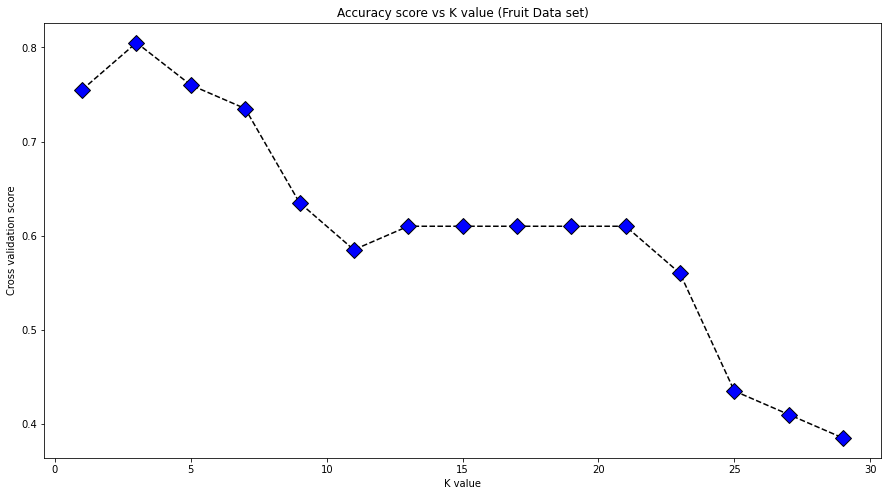

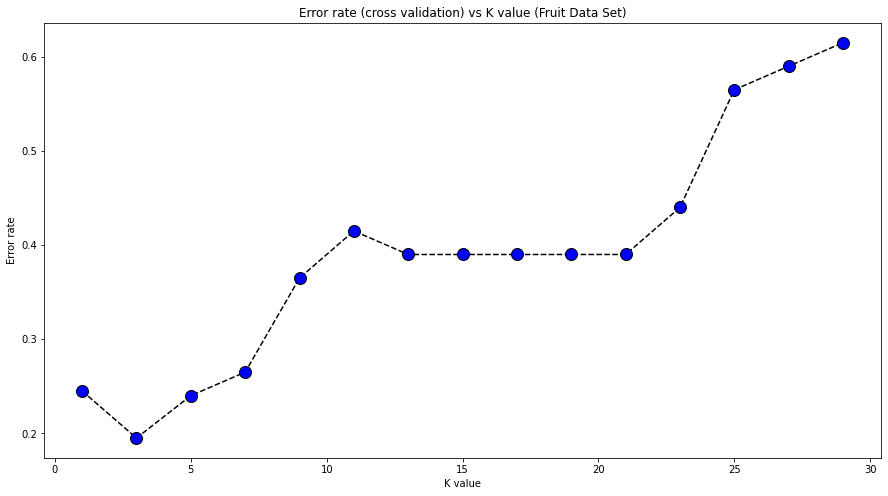

In [13]:
## KNN cross validation for K value
For_graph={}
cross_valscores_list=[]
error_rate_list = []
k_number=[]
for i in range(1,30,2):
    print (i)
    knn=KNeighborsClassifier(n_neighbors=i, weights= 'uniform', algorithm = 'auto')
    cross_val= cross_val_score(knn, x_train, y_train, cv=10, scoring = 'accuracy')
    cross_valscores_list.append(cross_val.mean())
    error_rate_list.append(1-cross_val.mean())
    cross_valscores_dictdata= (i,cross_val.mean(),1-cross_val.mean(),'Fruit')
    k_number.append(i)
    For_graph.setdefault('Fruit', []).append(cross_valscores_dictdata)

print (cross_valscores_list)

plt.figure(figsize=(15,8))
plt.plot(range(1,30,2), cross_valscores_list, color = 'black', linestyle='dashed', marker = 'D', markerfacecolor = 'blue', markersize = 12)

plt.title('Accuracy score vs K value (Fruit Data set)')
plt.xlabel('K value')
plt.ylabel('Cross validation score')

print ("The maximum cross validation score is {} at K = {}".format(max(cross_valscores_list), k_number[cross_valscores_list.index(max(cross_valscores_list))]))

plt.figure(figsize=(15,8))
plt.plot(range(1,30,2), error_rate_list, color = 'black', linestyle='dashed', marker = 'o', markerfacecolor = 'blue', markersize = 12)

plt.title('Error rate (cross validation) vs K value (Fruit Data Set)')
plt.xlabel('K value')
plt.ylabel('Error rate')

print ("The minimum error rate is {} at K = {}".format(min(error_rate_list), k_number[error_rate_list.index(min(error_rate_list))]))

fruit_df=pd.DataFrame(For_graph)
#Diabetes_df
#Diabetes_df.to_excel('Diabetes_df.xlsx')
fruit_df.to_excel("fruit_df.xlsx",sheet_name='Sheet_name_1')  


uniform
The selected optimum K is: 3
[[2 0 2 0]
 [0 2 0 0]
 [3 0 6 0]
 [0 0 0 3]]


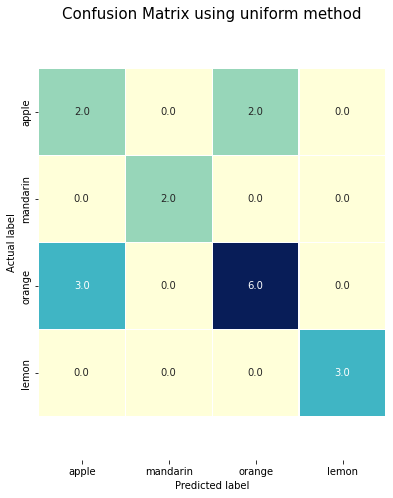

              precision    recall  f1-score   support

           1       0.40      0.50      0.44         4
           2       1.00      1.00      1.00         2
           3       0.75      0.67      0.71         9
           4       1.00      1.00      1.00         3

    accuracy                           0.72        18
   macro avg       0.79      0.79      0.79        18
weighted avg       0.74      0.72      0.73        18

****
distance
The selected optimum K is: 3
[[2 0 2 0]
 [0 2 0 0]
 [3 0 6 0]
 [0 0 0 3]]


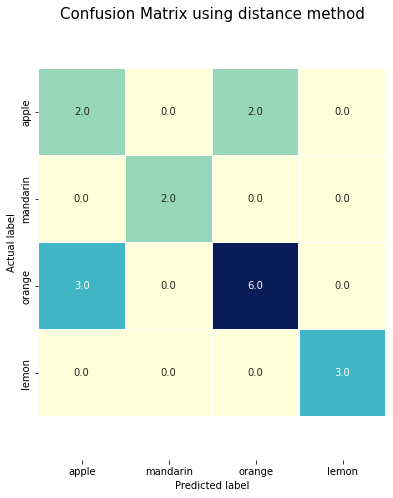

              precision    recall  f1-score   support

           1       0.40      0.50      0.44         4
           2       1.00      1.00      1.00         2
           3       0.75      0.67      0.71         9
           4       1.00      1.00      1.00         3

    accuracy                           0.72        18
   macro avg       0.79      0.79      0.79        18
weighted avg       0.74      0.72      0.73        18

****


In [15]:
## selecting K  from cross validation
for weights in ["uniform", "distance"]:
    print (weights)
    selected_k= k_number[error_rate_list.index(min(error_rate_list))]
    print ('The selected optimum K is:',selected_k)
    knn_neighnour=KNeighborsClassifier(n_neighbors=selected_k, weights= weights, algorithm = 'auto')
    knn_neighnour.fit(x_train, y_train)
    y_predict = knn_neighnour.predict(x_test)
    print(confusion_matrix(y_test,y_predict))
    cm= confusion_matrix(y_test,y_predict)
    df = pd.DataFrame(cm, index= ['apple', 'mandarin', 'orange', 'lemon'], columns = ['apple', 'mandarin', 'orange', 'lemon'])
    
    plt.figure(figsize=(15,8))
    sns.heatmap(df, annot = True, cbar = False, fmt = '.1f', linewidths = .3, square = True, cmap='YlGnBu');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    plt.title('Confusion Matrix using {} method'.format(weights), size = 15 );
    b,t = plt.ylim()
    b += 0.5
    t-= 0.5
    plt.ylim(b,t)
    plt.show()
    
    
    
    print(classification_report(y_test,y_predict))  
    print ('*'*4)
    